## **Imports** and Dataset Loading

# ML Regressions and Their Comparison

In [60]:
# === Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# === Load California Housing dataset ===
data = fetch_california_housing(as_frame=True)
X = data.data   # Features
y = data.target  # Target variable (median house value in $100,000s)


## Exploratory Data Analysis (EDA)

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



Dataset description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census

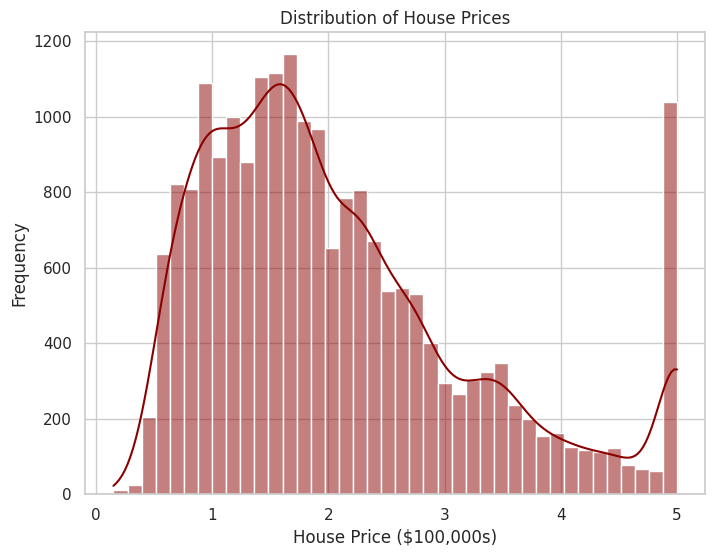

In [61]:
# === Show first few rows ===
print("First 5 rows of the dataset:")
display(X.head())

# === Dataset description ===
print("\nDataset description:")
print(data.DESCR)

# === Plot house price distribution ===
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=40, color='darkred')
plt.title('Distribution of House Prices')
plt.xlabel('House Price ($100,000s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Data Preprocessing

In [62]:
# === Feature Scaling (Standardization) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Linear Regression Model

In [63]:
# === Train Linear Regression ===
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# === Predict on Test Set ===
y_pred_lin = lin_reg.predict(X_test)

# === Evaluate Performance ===
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression MSE: {mse_lin:.4f}")
print(f"Linear Regression R²: {r2_lin:.4f}")


Linear Regression MSE: 0.5559
Linear Regression R²: 0.5758


## Polynomial Regression Model (Degree 2)

In [64]:
# === Polynomial Features ===
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# === Split Polynomial Features ===
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# === Train Polynomial Regression ===
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

# === Predict and Evaluate ===
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"\nPolynomial Regression (degree=2) MSE: {mse_poly:.4f}")
print(f"Polynomial Regression (degree=2) R²: {r2_poly:.4f}")



Polynomial Regression (degree=2) MSE: 0.4643
Polynomial Regression (degree=2) R²: 0.6457


## Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

# === Train Random Forest ===
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# === Predict and Evaluate ===
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor MSE: {mse_rf:.4f}")
print(f"Random Forest Regressor R²: {r2_rf:.4f}")



Random Forest Regressor MSE: 0.2555
Random Forest Regressor R²: 0.8050


## Gradient Boosting Regressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

# === Train Gradient Boosting ===
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)

# === Predict and Evaluate ===
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"\nGradient Boosting Regressor MSE: {mse_gb:.4f}")
print(f"Gradient Boosting Regressor R²: {r2_gb:.4f}")



Gradient Boosting Regressor MSE: 0.2940
Gradient Boosting Regressor R²: 0.7756


## XGBoost Regressor

In [67]:
# Optional: Only if xgboost is installed
from xgboost import XGBRegressor

# === Train XGBoost ===
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)

# === Predict and Evaluate ===
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost Regressor MSE: {mse_xgb:.4f}")
print(f"XGBoost Regressor R²: {r2_xgb:.4f}")



XGBoost Regressor MSE: 0.2273
XGBoost Regressor R²: 0.8266


## Plot: Actual vs Predicted Prices for All Models

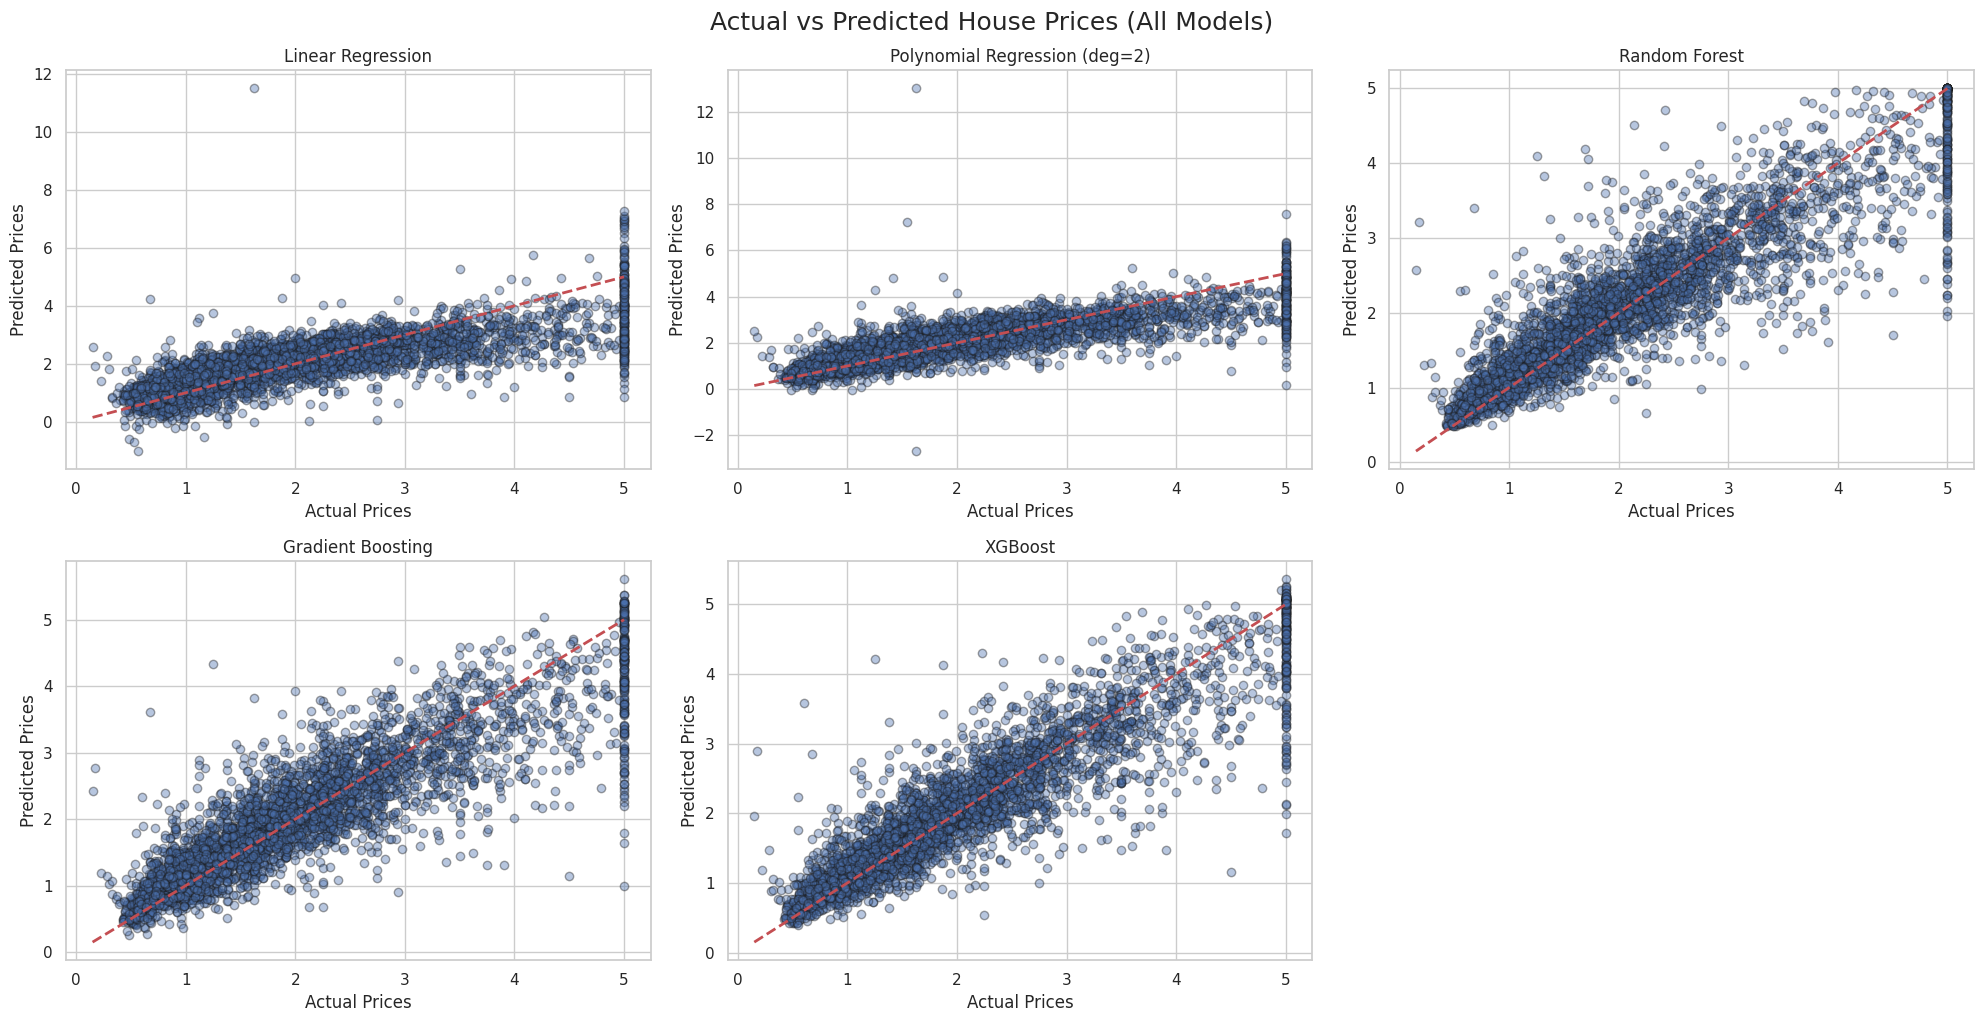

In [68]:
# === Prepare Predictions ===
model_predictions = {
    'Linear Regression': y_pred_lin,
    'Polynomial Regression (deg=2)': y_pred_poly,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'XGBoost': y_pred_xgb
}

# === Plot Settings ===
plt.figure(figsize=(20, 10))
for idx, (model_name, y_pred) in enumerate(model_predictions.items(), start=1):
    plt.subplot(2, 3, idx)
    plt.scatter(y_test, y_pred, alpha=0.4, edgecolor='k')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.title(model_name)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Actual vs Predicted House Prices (All Models)", fontsize=18, y=1.02)
plt.show()


# Deep Learning Regression Model (MLP using TensorFlow/Keras)
## Import Required Libraries

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


## Build and Compile the Model

In [70]:
# === Define Neural Network ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# === Compile Model ===
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



## Train the Model

In [71]:
# === Add Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# === Train ===
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 2.0275 - mae: 0.9229 - val_loss: 0.4727 - val_mae: 0.4954
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5450 - mae: 0.5345 - val_loss: 0.4316 - val_mae: 0.4707
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4947 - mae: 0.5020 - val_loss: 0.4077 - val_mae: 0.4479
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4656 - mae: 0.4869 - val_loss: 0.4055 - val_mae: 0.4455
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5533 - mae: 0.4820 - val_loss: 0.3785 - val_mae: 0.4267
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4750 - mae: 0.4685 - val_loss: 0.4001 - val_mae: 0.4241
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4061 - mae: 0.4499 - val_loss: 0.3667 - val_mae: 0.4219
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4067 - mae: 0.4504 - val_loss: 0.3848 - val_mae: 0.4114
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

## Visualize Training Progress

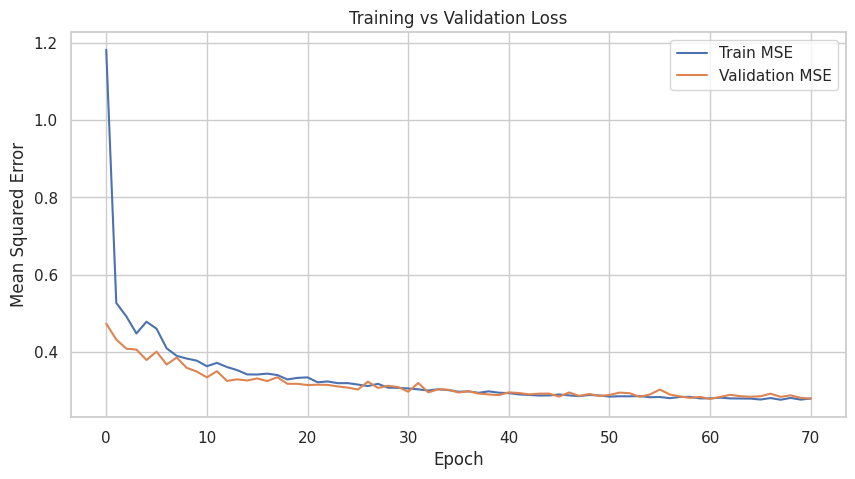

In [72]:
# === Plot Loss Curves ===
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


## Evaluate the Model

In [73]:
# === Predict on Test Data ===
y_pred_nn = model.predict(X_test).flatten()

# === Evaluate ===
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"\nNeural Network MSE: {mse_nn:.4f}")
print(f"Neural Network R²: {r2_nn:.4f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Neural Network MSE: 0.2701
Neural Network R²: 0.7939


## Add NN Results to Comparison Table

In [74]:
# === Add Neural Network Results (Pandas 2.0+ Compatible) ===
nn_result = pd.DataFrame([{
    'Model': 'Neural Network (Deep Learning)',
    'MSE': mse_nn,
    'R² Score': r2_nn
}])

results = pd.concat([results, nn_result], ignore_index=True)

# Display updated results
display(results.sort_values(by='R² Score', ascending=False))


,Model,MSE,R² Score
4,XGBoost,0.227262,0.826571
2,Random Forest,0.255498,0.805024
5,Neural Network (Deep Learning),0.263983,0.798549
6,Neural Network (Deep Learning),0.270098,0.793882
3,Gradient Boosting,0.293999,0.775643
1,Polynomial Regression (deg=2),0.464302,0.645682
0,Linear Regression,0.555892,0.575788


## Plot: R² Score Comparison (ML vs Neural Network)

/tmp/ipython-input-1353875515.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




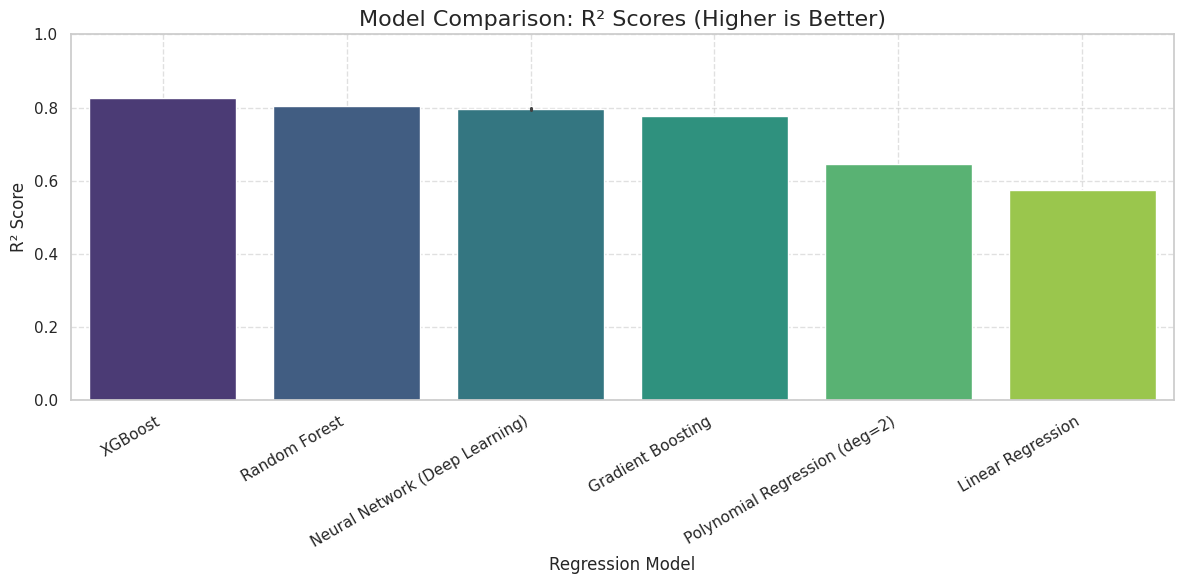

In [75]:
# === Bar Plot of R² Scores for All Models ===
plt.figure(figsize=(12, 6))
sns.barplot(data=results.sort_values(by='R² Score', ascending=False),
            x='Model', y='R² Score', palette='viridis')

plt.title('Model Comparison: R² Scores (Higher is Better)', fontsize=16)
plt.xlabel('Regression Model')
plt.ylabel('R² Score')
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
